2022 calculate size of mac marsh threshold areas



**Date** August 2022

Import some useful modules

In [3]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
#from datacube.storage import masking
import os
#sys.path.append('../Scripts/')
#import dea_spatialtools
import pandas as pd
import numpy as np


In [4]:
import sys
sys.path.insert(1, '../Tools/')
import dea_tools.datahandling
from datacube.utils import masking
import dea_tools.spatial #hopefully this replaces dea_spatialtools

In [5]:
from datacube.utils.cog import write_cog

## Load in the repaired cewo file

In [6]:
# Open the GeoTIFFs using rasterio

In [7]:
test_fix = '/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/cewo_20160628_extents_again.tif'

In [8]:
cewo_fix = xr.open_rasterio(test_fix)

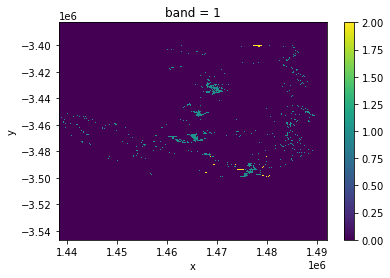

In [9]:
cewo_fix.plot()
plt.show()

Notes: 0 is the nodata value, 1 is the wet value, and 2 is the storage value.

In [10]:
cewo_fix = cewo_fix.squeeze()

build our comparison raster

In [13]:
# #nodata values
# cewo_fix2 =cewo_fix.where(cewo_fix!=65535.)
# cewo_fix2=cewo_fix2.where(cewo_fix2!=-3.4028234663852886e+38)
# cewo_fix2=cewo_fix2.where(cewo_fix2!=0)
# cewo_fix2=cewo_fix2.where(cewo_fix2!=2)

In [11]:
#remove the nodata values
study_area = cewo_fix.where(cewo_fix!=65535.)
study_area = study_area.where(study_area!=-3.4028234663852886e+38)

calculate the mapped area

In [12]:
#calculate the total area
total_area=np.round((study_area.count()*25*25)/(1000*1000),2)
print(total_area.values,'km^2')

8795.76 km^2


In [14]:
cewoCount = cewo_fix2.count()
#cewoarea=numpy.round((cewoCount*25*25)/(1000*1000),2)
cewoarea=np.round((cewoCount*25*25)/(1000*1000),2)
print(cewoarea.values,'km^2')

99.27 km^2


In [60]:
nonwet_area_c = total_area-cewoarea
print(nonwet_area_c .values,'km^2')

8696.49 km^2


In [61]:
cewo_fix2

<xarray.DataArray (y: 6564, x: 2144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    band     int64 1
  * y        (y) float64 -3.383e+06 -3.383e+06 ... -3.547e+06 -3.547e+06
  * x        (x) float64 1.438e+06 1.438e+06 1.438e+06 ... 1.492e+06 1.492e+06
Attributes:
    transform:      (25.0, 0.0, 1438421.0013571545, 0.0, -25.0, -3382788.8746...
    crs:            +init=epsg:3577
    res:            (25.0, 25.0)
    is_tiled:       0
    nodatavals:     (0.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [12]:
#write this out as a cog
#write_cog(cewo_fix2, fname='/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/cewo_20160628_extents_2022b.tif')

## Build the loop to load our rasters and calculate our %coverage

thresholds are our chosen thresholds for the TCW; these need to match the filenames, and are not set here.

In [13]:
thresholds = ['-0','-100','-200','-300','-400','-500','-600']

make a dataframe to fill with our results

In [63]:
comparison_df_pixels = pd.DataFrame(columns=['TCW','notTCW','%ofwet','%ofdry'],index=thresholds)
comparison_df_area = pd.DataFrame(columns=['TCW km^2','notTCW km^2','%ofwet km^2', '%ofdrykm^2'],index=thresholds)

In [65]:
#comparison_df_area

In [16]:
#Goes through and opens each thresholded tif file. calculates the area and adds it to a df.

In [20]:
#make a list of the files thresholdFiles =[]
for i in range(0, len(thresholds)):
    thresholdFiles.append('/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t{0}_Mac_14_-35_20160627__20160629_clipped.tif'.format(thresholds[i]))
    print (thresholdFiles[i])

/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-0_Mac_14_-35_20160627__20160629_clipped.tif
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-100_Mac_14_-35_20160627__20160629_clipped.tif
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-200_Mac_14_-35_20160627__20160629_clipped.tif
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-300_Mac_14_-35_20160627__20160629_clipped.tif
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-400_Mac_14_-35_20160627__20160629_clipped.tif
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-500_Mac_14_-35_20160627__20160629_clipped.tif
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-600_Mac_14_-35_20160627__20160629_clipped.tif


In [38]:
#test1 = xr.open_rasterio(thresholdFiles[i])

In [40]:
#test2 = test1.to_dataset(name=thresholds[i])

In [43]:
#test2[str(thresholds[i-1])]=xr.open_rasterio(thresholdFiles[i-1]) #add each additional thing to the dataset. 

In [62]:
#test2

In [67]:
#make a list of the files corresponding to our set thresholds
thresholdFiles =[]
for i in range(0, len(thresholds)):
    thresholdFiles.append('/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t{0}_Mac_14_-35_20160627__20160629_clipped.tif'.format(thresholds[i]))
    print (thresholdFiles[i])
    
    ThresholdData = xr.open_rasterio(thresholdFiles[i]) #thresholded TCW
    #count total pixels
    totalcount = xr.open_rasterio(thresholdFiles[i]).count()
    notarea = np.round((totalcount*25*25)/(1000*1000),2)
    print(notarea)
#     ThresholdData=ThresholdData.where(ThresholdData!=-3.4028234663852886e+38)
#     ThresholdData=ThresholdData.where(ThresholdData!=0)
#     ThresholdData=ThresholdData.where(cewo_fix.data!=2.0)
#     thresholdCount=ThresholdData.where(ThresholdData==1.).count()
#     #thresholdarea=numpy.round((thresholdCount*25*25)/(1000*1000),2)
#     thresholdarea=np.round((thresholdCount*25*25)/(1000*1000),2)
#     both = cewo_fix2.where(ThresholdData==1)
#     bothCount = both.count()
#     #botharea=numpy.round((thresholdCount*25*25)/(1000*1000),2)
#     botharea=np.round((bothCount*25*25)/(1000*1000),2)
#     comparison_df_pixels.loc[thresholds[i]]=[thresholdCount.data, cewoCount.data, bothCount.data, np.round(((bothCount/cewoCount)*100).data,decimals=2)]
#     comparison_df_area.loc[thresholds[i]]=[thresholdarea.data, cewoarea.data, botharea.data, np.round(((botharea/cewoarea)*100).data,decimals=2)]
#     print(botharea)
#     plt.clf()
#     cewo_fix2.plot(cmap='Greens', vmin=0,vmax=1)
#     ThresholdData.plot(cmap='viridis',vmin=0,vmax=1)
#     both.plot(cmap='Wistia',vmin=0,vmax=1)
#     print('ready to save plots')
    
#     %matplotlib inline
#     plt.clf()
#     fig = plt.figure(figsize=(10,11))
#     ax=plt.gca()
#     cewo_fix2.plot(cmap='Greens', vmin=0,vmax=1, alpha=0.7,add_colorbar=False)
#     ThresholdData.plot(cmap='Greens',vmin=0,vmax=3,alpha=0.7,add_colorbar=False)
#     both.plot(cmap='winter',vmin=0,vmax=1, alpha=0.7,add_colorbar=False)
#     plt.title("TCW threshold "+thresholds[i])
#     ax.set_ylim((-3500000, -3400000))
#     print('ready to save plots')
#     #plt.savefig('/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/plots2022/'+"3TCW_threshold_"+thresholds[i]+100321'.png')
#     #plt.show()

/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-0_Mac_14_-35_20160627__20160629_clipped.tif
<xarray.DataArray ()>
array(8795.76)
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-100_Mac_14_-35_20160627__20160629_clipped.tif
<xarray.DataArray ()>
array(8795.76)
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-200_Mac_14_-35_20160627__20160629_clipped.tif
<xarray.DataArray ()>
array(8795.76)
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-300_Mac_14_-35_20160627__20160629_clipped.tif
<xarray.DataArray ()>
array(8795.76)
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-400_Mac_14_-35_20160627__20160629_clipped.tif
<xarray.DataArray ()>
array(8795.76)
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-500_Mac_14_-35_20160627__2016

/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-0_Mac_14_-35_20160627__20160629_clipped.tif
<xarray.DataArray ()>
array(24.3)
ready to save plots
ready to save plots
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-100_Mac_14_-35_20160627__20160629_clipped.tif
<xarray.DataArray ()>
array(32.15)
ready to save plots
ready to save plots
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-200_Mac_14_-35_20160627__20160629_clipped.tif
<xarray.DataArray ()>
array(41.26)
ready to save plots
ready to save plots
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-300_Mac_14_-35_20160627__20160629_clipped.tif
<xarray.DataArray ()>
array(49.64)
ready to save plots
ready to save plots
/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-400_Mac_14_-35_20160627__20160629_clipped.tif
<xarray.

<Figure size 432x288 with 0 Axes>

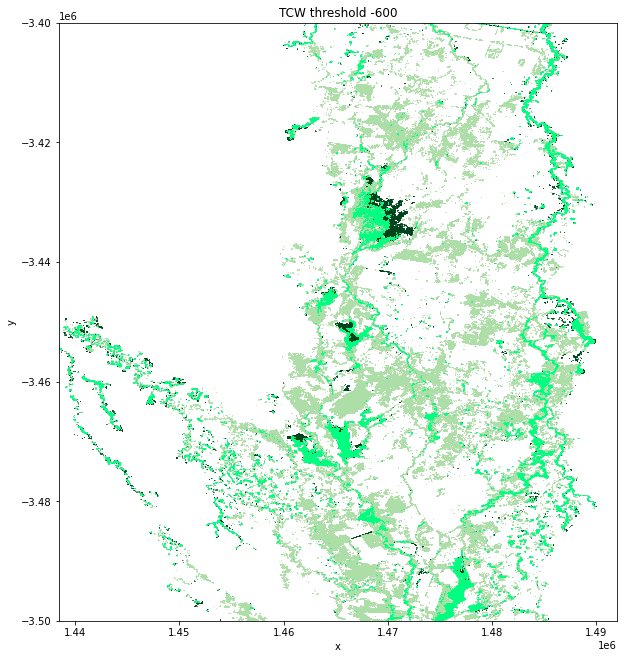

In [17]:
# #make a list of the files corresponding to our set thresholds
# thresholdFiles =[]
# for i in range(0, len(thresholds)):
#     thresholdFiles.append('/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t{0}_Mac_14_-35_20160627__20160629_clipped.tif'.format(thresholds[i]))
#     print (thresholdFiles[i])
    
#     ThresholdData = xr.open_rasterio(thresholdFiles[i]) #thresholded TCW
#     ThresholdData=ThresholdData.where(ThresholdData!=-3.4028234663852886e+38)
#     ThresholdData=ThresholdData.where(ThresholdData!=0)
#     ThresholdData=ThresholdData.where(cewo_fix.data!=2.0)
#     thresholdCount=ThresholdData.where(ThresholdData==1.).count()
#     #thresholdarea=numpy.round((thresholdCount*25*25)/(1000*1000),2)
#     thresholdarea=np.round((thresholdCount*25*25)/(1000*1000),2)
#     both = cewo_fix2.where(ThresholdData==1)
#     bothCount = both.count()
#     #botharea=numpy.round((thresholdCount*25*25)/(1000*1000),2)
#     botharea=np.round((bothCount*25*25)/(1000*1000),2)
#     comparison_df_pixels.loc[thresholds[i]]=[thresholdCount.data, cewoCount.data, bothCount.data, np.round(((bothCount/cewoCount)*100).data,decimals=2)]
#     comparison_df_area.loc[thresholds[i]]=[thresholdarea.data, cewoarea.data, botharea.data, np.round(((botharea/cewoarea)*100).data,decimals=2)]
#     print(botharea)
#     plt.clf()
#     cewo_fix2.plot(cmap='Greens', vmin=0,vmax=1)
#     ThresholdData.plot(cmap='viridis',vmin=0,vmax=1)
#     both.plot(cmap='Wistia',vmin=0,vmax=1)
#     print('ready to save plots')
    
#     %matplotlib inline
#     plt.clf()
#     fig = plt.figure(figsize=(10,11))
#     ax=plt.gca()
#     cewo_fix2.plot(cmap='Greens', vmin=0,vmax=1, alpha=0.7,add_colorbar=False)
#     ThresholdData.plot(cmap='Greens',vmin=0,vmax=3,alpha=0.7,add_colorbar=False)
#     both.plot(cmap='winter',vmin=0,vmax=1, alpha=0.7,add_colorbar=False)
#     plt.title("TCW threshold "+thresholds[i])
#     ax.set_ylim((-3500000, -3400000))
#     print('ready to save plots')
#     #plt.savefig('/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/plots2022/'+"3TCW_threshold_"+thresholds[i]+100321'.png')
#     #plt.show()

In [18]:
comparison_df_area

,TCW km^2,CEWO km^2,both km^2,%ofCEWO
-0,27.98,99.27,24.3,24.48
-100,38.41,99.27,32.15,32.39
-200,53.51,99.27,41.26,41.56
-300,76.94,99.27,49.64,50.01
-400,120.51,99.27,56.98,57.4
-500,201.18,99.27,63.73,64.2
-600,360.96,99.27,69.79,70.3


In [1]:
%matplotlib inline
plt.clf()
fig = plt.figure(figsize=(10,11))
ax=plt.gca()
#ax.set_facecolor('xkcd:khaki')
cewo_fix2.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot(cmap='Greens', vmin=0,vmax=1, alpha=0.5,add_colorbar=False)
ThresholdData.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot(cmap='Greens',vmin=0,vmax=2,alpha=0.5,add_colorbar=False)
both.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot(cmap='winter',vmin=0,vmax=1, alpha=0.5,add_colorbar=False)
plt.title("TCW threshold "+thresholds[i])
ax.set_ylim((-3500000, -3400000))
plt.show()

Matplotlib is building the font cache using fc-list. This may take a moment.


NameError: name 'plt' is not defined

In [ ]:
#write table to csv
#plot.

In [ ]:
#comparison_df_pixels.to_csv('/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/Pixel_Comparison_Table_2022.csv',)

In [ ]:
(91171/158833)*100

In [12]:
comparison_df_area

,TCW km^2,CEWO km^2,both km^2,%ofCEWO
-0,27.98,99.27,24.3,24.48
-100,38.41,99.27,32.15,32.39
-200,53.51,99.27,41.26,41.56
-300,76.94,99.27,49.64,50.01
-400,120.51,99.27,56.98,57.4
-500,201.18,99.27,63.73,64.2
-600,360.96,99.27,69.79,70.3


In [ ]:
#comparison_df_area.to_csv('/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/Area_Comparison_Table_2022.csv',)

In [ ]:
# ThresholdData = xr.open_rasterio(thresholdFiles[0]) #thresholded TCW
#

In [ ]:
%matplotlib inline
plt.clf()
cewo_fix.plot(vmin=0, vmax=2, cmap='magma')
plt.show()

In [ ]:
# cewo_fix2 =cewo_fix.where(cewo_fix!=65535.)
# cewo_fix2=cewo_fix2.where(cewo_fix2!=-3.4028234663852886e+38)
# cewo_fix2=cewo_fix2.where(cewo_fix2!=0)
# cewo_fix2=cewo_fix2.where(cewo_fix2!=2)

In [ ]:
#cewo_fix2.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot()

In [ ]:
# cewoCount = cewo_fix2.count()

In [ ]:
both = cewo_fix2.where(ThresholdData==1)

In [ ]:
thresholdCount=ThresholdData.where(ThresholdData==1.).count()

In [ ]:
thresholdCount

In [ ]:
bothCount = both.count()

In [ ]:
plt.clf()
cewo_fix2.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot()
ThresholdData.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot(cmap='magma')
both.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot(cmap='Wistia')
plt.show()

In [ ]:
thresholds

In [ ]:
comparison_df = pd.DataFrame(columns=['TCW','CEWO','both','%ofCEWO'],index=thresholds)

In [ ]:
comparison_df.loc['-0']=[thresholdCount.data, cewoCount.data, bothCount.data, numpy.round(((bothCount/cewoCount)*100).data,decimals=2)]

In [ ]:
comparison_df

In [ ]:
## #filter out both sets of nodata values as defined by CEWO
# cewoData = cewoData.where(cewoData!=-3.4028234663852886e+38) #remove no data vals
# cewoData = cewoData.where(cewoData!=0) #remove no data vals
# cewoData = cewoData.where(cewoData!=65535.) #remove no data vals
# #cewoData = cewoData.where(cewoData!=2.) #remove off river storages

In [ ]:
plt.clf()
cewoData.plot()
plt.show()

In [ ]:
cewoData

In [ ]:
ThresholdData

In [ ]:
plt.clf()
ThresholdData.plot()
plt.show()

In [ ]:
# ThresholdData=ThresholdData.where(ThresholdData!=-3.4028234663852886e+38)
# ThresholdData=ThresholdData.where(ThresholdData!=0)
# ThresholdData=ThresholdData.where(cewoData.data!=2.0)

In [ ]:
ThresholdData

In [ ]:
#ThresholdData=ThresholdData.where(ThresholdData!=-3.4028234663852886e+38)
#ThresholdData=ThresholdData.where(ThresholdData!=0)
#ThresholdData=ThresholdData.where(cewoData.data!=2.0)

In [ ]:
plt.clf()
ThresholdData.plot()
plt.show()

In [ ]:
cewoData2=cewoData.where(cewoData!=65535.)
cewoData2 = cewoData2.where(cewoData2!=-3.4028234663852886e+38) #remove no data vals
cewoData2 = cewoData2.where(cewoData2!=0) #remove no data vals
cewoData2 = cewoData2.where(cewoData2.data!=2.0) #remove storages

In [ ]:
cewo_comp = cewo_comp.where(cewo_comp!=-3.4028234663852886e+38)
print(cewo_comp.count())
cewo_comp = cewo_comp.where(cewo_comp!=0)
print(cewo_comp.count())
cewo_comp = cewo_comp.where(cewo_comp!=65535.)
print(cewo_comp.count())
cewo_comp = cewo_comp.where(cewo_comp!=2.0)
print(cewo_comp.count())

In [ ]:
cewoData2.max()

In [ ]:
cewo_comp.size, ThresholdData.size

In [ ]:
print(cewo_comp.count(), ThresholdData.count())

In [ ]:
cewoData2.plot() 
plt.show()

In [ ]:
cewo

Shouldn't have to do this again but here is the reproject to template function, with intro

In [ ]:
# output = SpatialTools.reproject_to_template(cewo_compFile,thresholdFiles[0],'/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/no_storages/cewo_20160628_test.tif')
# output = None